In [1]:
import torch

# Local imports
from train import train_model

In [2]:
import sys
print(sys.executable)
print(sys.version)

/opt/miniconda3/bin/python
3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]


In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda:0


In [4]:
# In your train.ipynb cell where `args` is defined:

args = {
    "dataset": "DAVIS",  # Or "KIBA", "CD4C"
    "data_path": "../data",
    "protein_graph_dir": "../data/protein_graphs",  # <--- ADD THIS LINE (or update existing)
    "model_path": '../models/gat_cd4c_davis_graphs.pth', # Example model path
    "seed": 42,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "batch_size": 64, # ছিল 128
    "max_epochs": 100, # ছিল 500
    "lr": 5e-5,      # ছিল 1e-4
    "weight_decay": 1e-5, # ছিল 2e-4
    "stoppage_epochs": 30, # ছিল 32
    "scheduler_patience": 10,
    "scheduler_factor": 0.5,
    "huber_beta": 0.5,
    "clip_grad_norm": 1.0,
    "use_small_dataset": False, # True for quick testing
    "frac_train": 0.8,
    "frac_validation": 0.1,
    "frac_test": 0.1,
    "max_nodes": 72, # Max nodes for padding
    "num_workers": 4, # Or based on your CPU cores
    
    # Model architecture (these should match defaults in get_parser or be set explicitly)
    "hidden_size": 192,
    "emb_size": 96, 
    "num_layers": 4,
    "num_attn_heads": 6,
    "dropout": 0.15, # ছিল 0.1
    "mlp_dropout": 0.15, # ছিল 0.2
    "pooling_dim": 96,
    "mlp_hidden": 192,
    "use_cross": True, # Or False
    # "include_3d_drug": False, # This is handled by getattr in train.py if not present
}

# Then this line converts it to a namespace
# training_args = argparse.Namespace(**args) 
# train_model(training_args, device)

In [5]:
import argparse

training_args = argparse.Namespace(**args)
train_model(training_args, device)

Model parameters: 738,709
Attempting to load main interaction data from: ../data/DAVIS_dataset.csv
Loading main interaction data from cached file: ../data/DAVIS_dataset.csv
Renamed columns: {'Y': 'Label'}
Dataset split: Train 20617, Validation 2577, Test 2578


NameError: name 'tqdm' is not defined

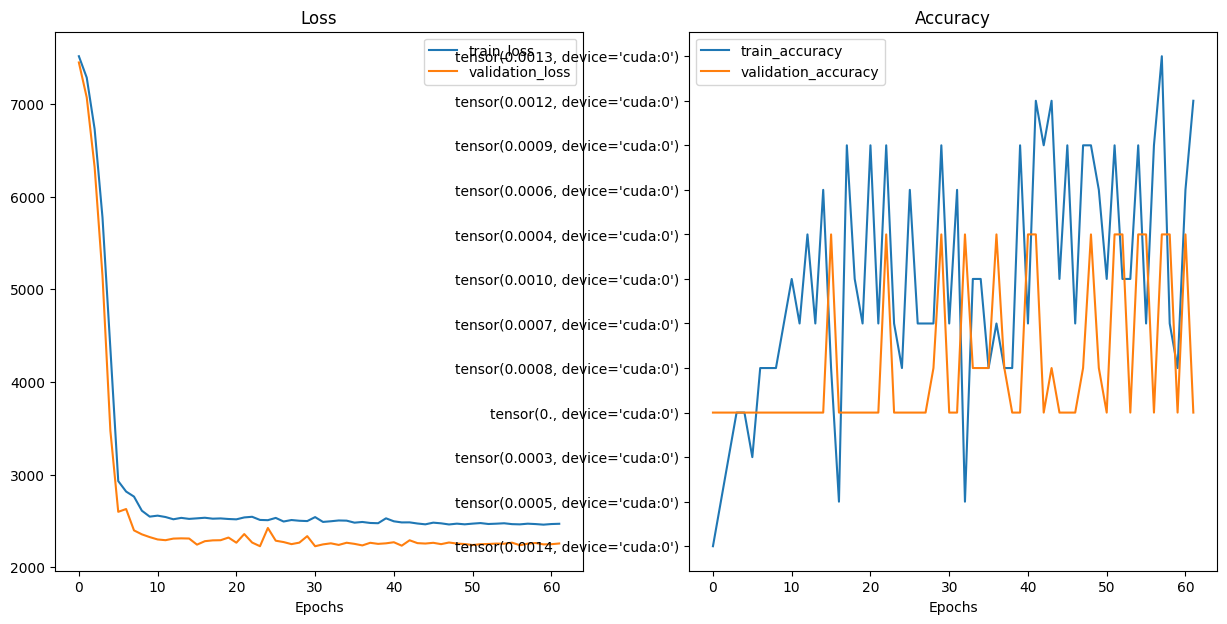

In [6]:
import pandas as pd

from utils.helper_functions import plot_loss_curves

csv_path = f"{training_args.model_path}.csv"
metrics = pd.read_csv(csv_path) 

plot_loss_curves(metrics)